In [33]:
import pandas as pd
import re
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart
filename = 'class_credit_score.csv'
original_dataset = pd.read_csv(filename, index_col='ID', sep=',', decimal='.', na_values='')

In [34]:
import numpy as np

columns_to_treat = ["Age", "SSN", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]
relevant = ["Age", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]

df = pd.DataFrame(original_dataset)

#cha = df["Credit_History_Age"]
#cha_month = []
#cha_real = []
#cha_year = []
#
#for val in cha:
#    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
#    if matches == [] or val == np.nan:
#        cha_real.append(np.nan)
#        cha_month.append(np.nan)                                                                   # Gerar colunas para separação de credit history age
#        cha_year.append(np.nan)
#    else:
#        cha_real.append(float(matches[0][0]) + ((float(matches[0][1]) - 1) / 12))
#        cha_month.append(int(matches[0][1]))
#        cha_year.append(int(matches[0][0]))
#
#df["Credit_History_Age_Real"] = cha_real
#df["Credit_History_Age_Month"] = cha_month
#df["Credit_History_Age_Year"] = cha_year

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].apply(lambda x: np.nan if x == -500 or x >= 150 else x)
df['Age'] = df['Age'].astype(str).str.replace('_', '', regex=False)

# Check and clean 'SSN' column
pattern = r'^\d{3}-\d{2}-\d{4}$'  # Replace this with your SSN regex pattern
df['SSN'] = df['SSN'].apply(lambda x: x if re.match(pattern, str(x)) else np.nan)

df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0 else np.nan)

df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x >= 0 and x <= 60 else np.nan)

df['NumofLoan'] = df['NumofLoan'].apply(lambda x: x if x >= 0 else np.nan)

#df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: x if str(x) in ["Yes", "No"] else np.nan)

df['MonthlyBalance'] = df['MonthlyBalance'].apply(lambda x: x if x >= 0 else np.nan)

#for col in columns_to_treat:           # remover NAs das colunas relevantes
#    if col in relevant:
#       df = df[df[col].notna()]

Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
NumofLoan
Delay_from_due_date
NumofDelayedPayment
ChangedCreditLimit
NumCreditInquiries
OutstandingDebt
CreditUtilizationRatio
TotalEMIpermonth
Amountinvestedmonthly
MonthlyBalance
Age


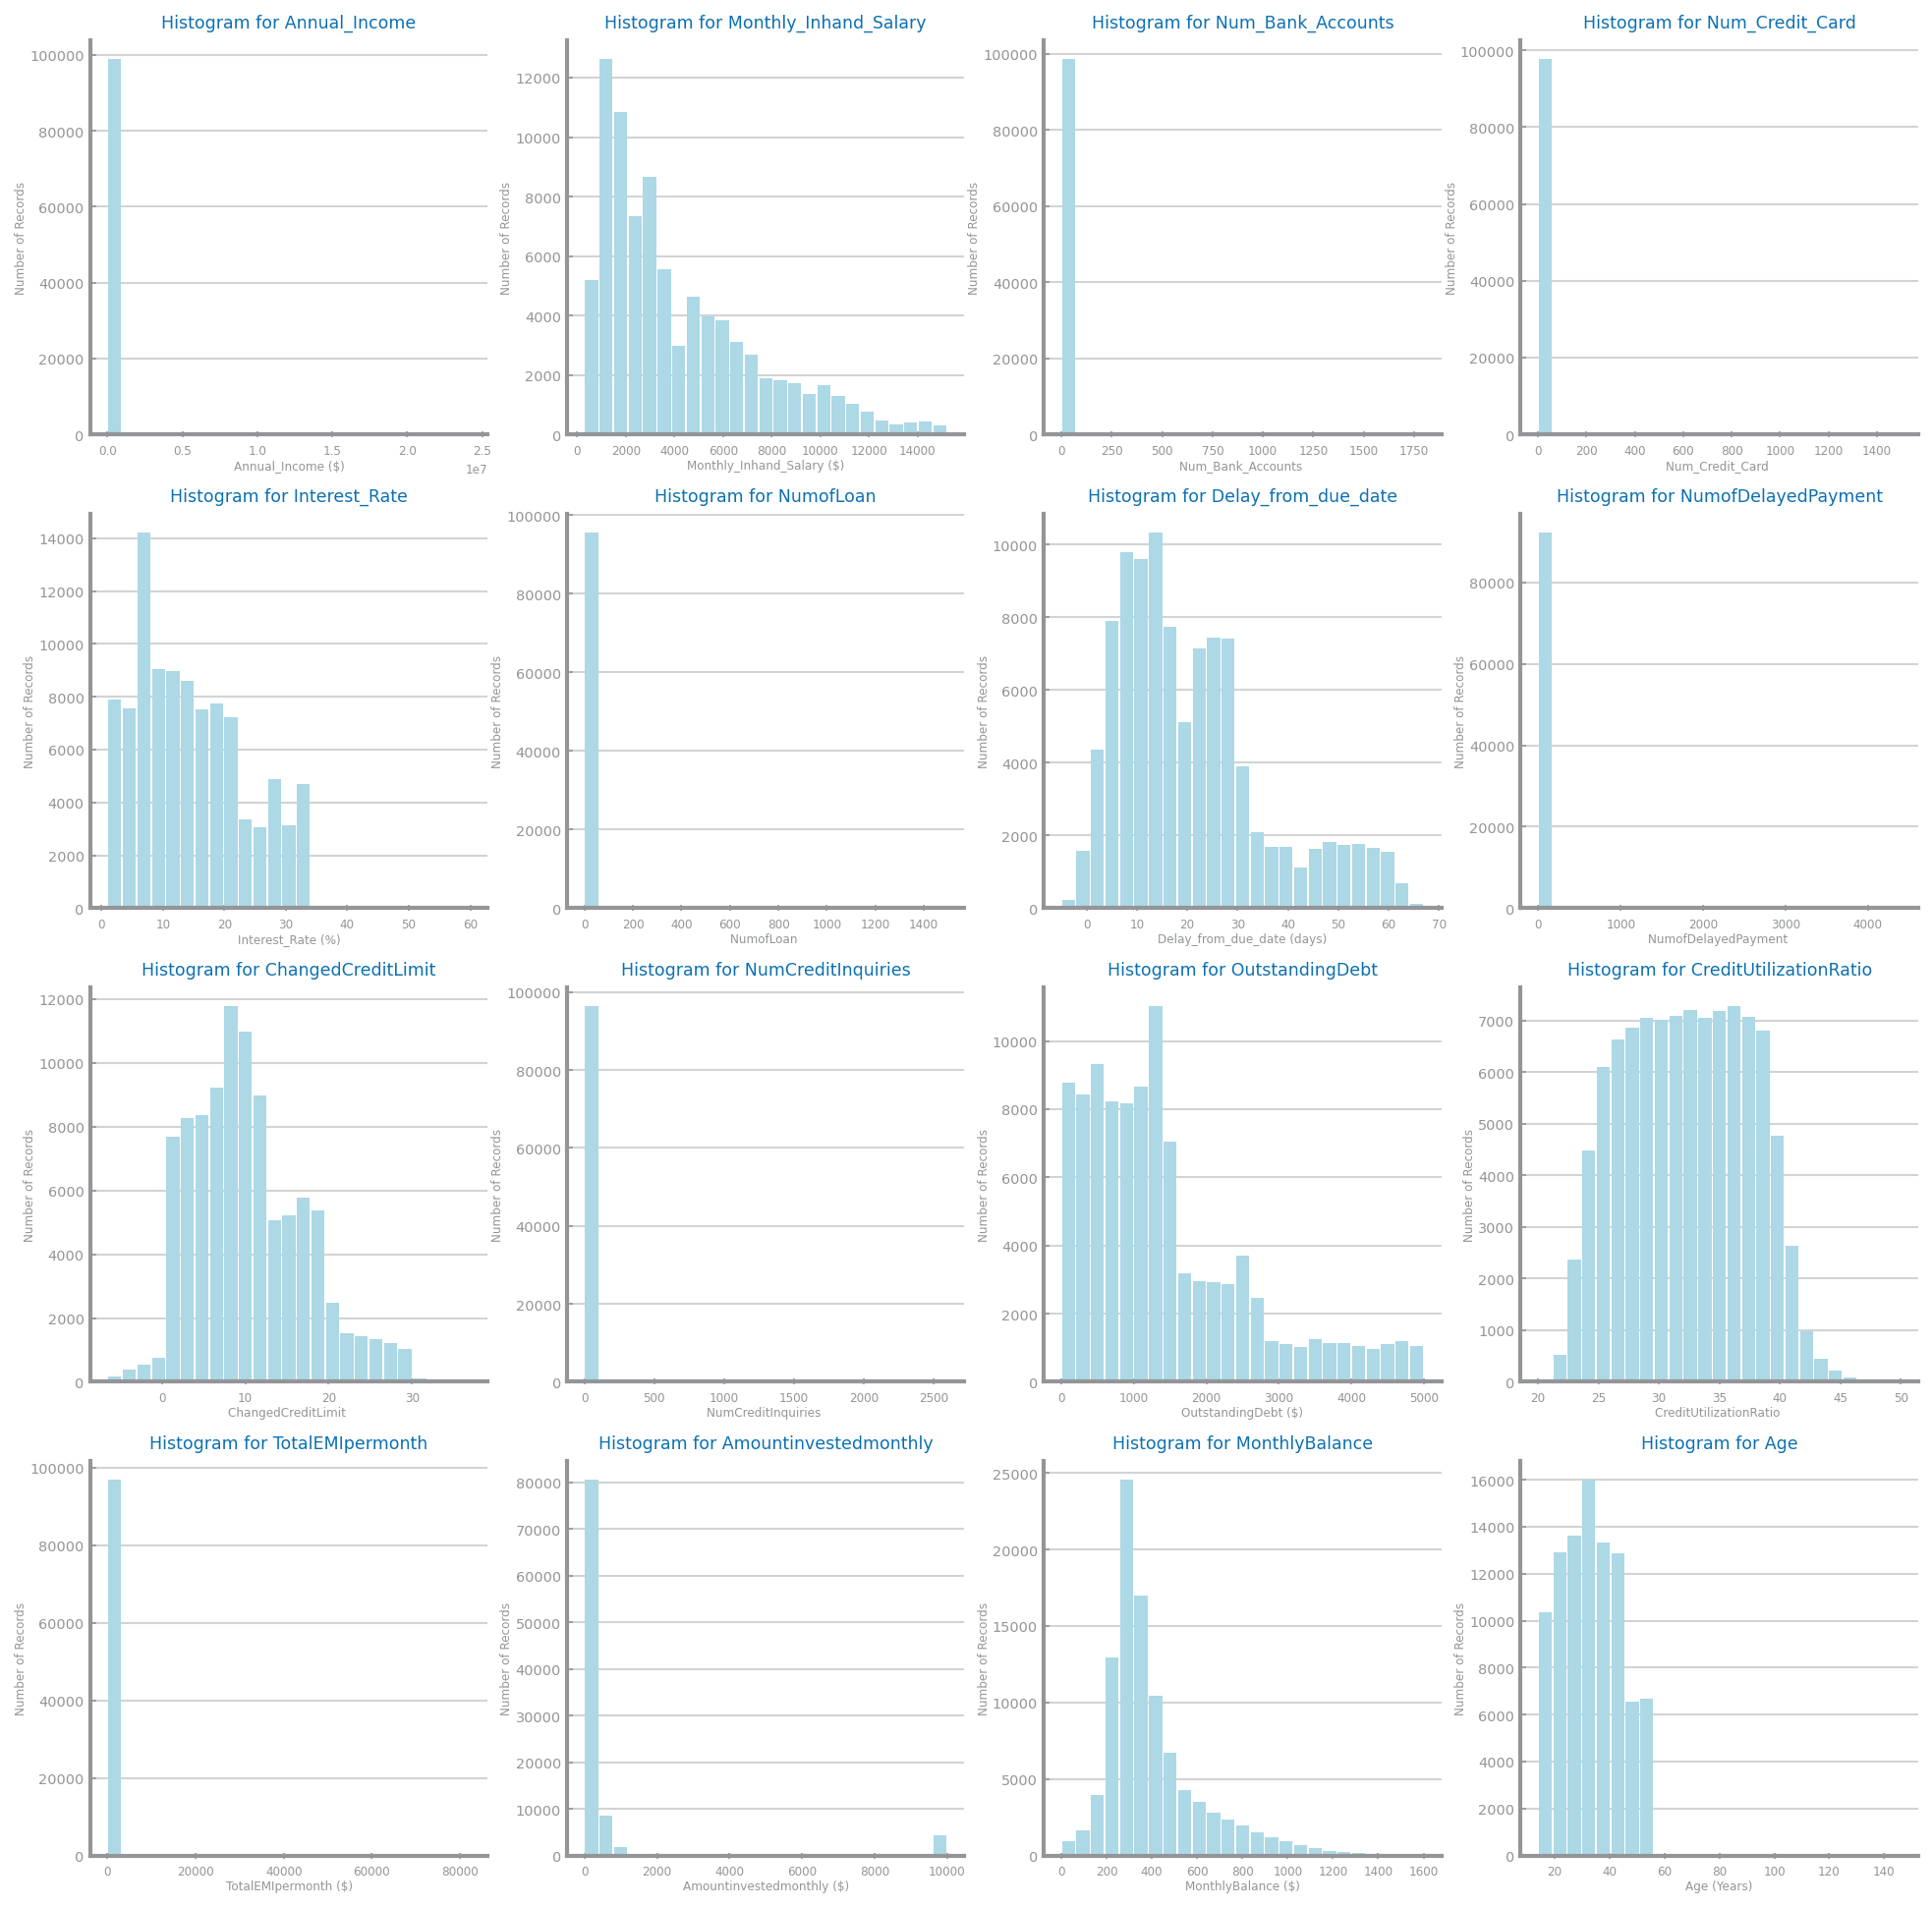

In [35]:
import matplotlib.pyplot as plt
import dslabs_functions as ds
import re

units = {
    "Age": "(Years)",
    "Annual_Income": "($)",
	"Monthly_Inhand_Salary": "($)",
	"Num_Bank_Accounts": "",
    "Num_Credit_Card": "",
	"Interest_Rate": "(%)",
	"NumofLoan": "",
	"Delay_from_due_date": "(days)",
    "NumofDelayedPayment": "",
	"ChangedCreditLimit": "",
	"NumCreditInquiries": "",
    "OutstandingDebt": "($)",
	"CreditUtilizationRatio": "",
	"TotalEMIpermonth": "($)",
    "Amountinvestedmonthly": "($)",
	"MonthlyBalance": "($)",
    "CreditHistoryAge": "(Years)"
}

t = df.select_dtypes(include=['number', 'float'])
t["Age"] = pd.to_numeric(df['Age'], errors='coerce')
variables = t.columns
rows, cols = ds.define_grid(len(variables), 4)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s' % variables[n])
    axs[i, j].set_xlabel(f'{variables[n]} {units[variables[n]]}')
    axs[i, j].set_ylabel('Number of Records')

    # Adjusting the rwidth parameter to increase the distance between bars along the x-axis
    print(variables[n])
    axs[i, j].hist(t[variables[n]].values, bins=25, color='lightblue', rwidth=0.9)  # Adjust rwidth

    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

savefig(f"images/figure_granularity_25.png")  # Save the figure
show()

In [ ]:
import matplotlib.pyplot as plt
import dslabs_functions as ds
import re

units = {
    "Age": "(Years)",
    "Annual_Income": "($)",
	"Monthly_Inhand_Salary": "($)",
	"Num_Bank_Accounts": "",
    "Num_Credit_Card": "",
	"Interest_Rate": "(%)",
	"NumofLoan": "",
	"Delay_from_due_date": "(days)",
    "NumofDelayedPayment": "",
	"ChangedCreditLimit": "",
	"NumCreditInquiries": "",
    "OutstandingDebt": "($)",
	"CreditUtilizationRatio": "",
	"TotalEMIpermonth": "($)",
    "Amountinvestedmonthly": "($)",
	"MonthlyBalance": "($)",
    "CreditHistoryAge": "(Years)"
}
print(len(units))

hist_age = df["Credit_History_Age"]
hist_vals = []

for val in hist_age:
    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
    if matches == []:
        continue
    else:
        hist_vals += [float(matches[0][0]) + ((float(matches[0][1])-1)/12) ,]

df["CreditHistoryAge"] = pd.Series(hist_vals).astype(float)

t = df.select_dtypes(include=['number', 'float'])
t["Age"] = pd.to_numeric(df['Age'], errors='coerce')
variables = t.columns
rows, cols = ds.define_grid(len(variables), 4)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s' % variables[n])
    axs[i, j].set_xlabel(f'{variables[n]} {units[variables[n]]}')
    axs[i, j].set_ylabel('Number of Records')

    # Adjusting the rwidth parameter to increase the distance between bars along the x-axis
    axs[i, j].hist(t[variables[n]].values, "auto")  # Adjust rwidth

    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

savefig(f"images/t.png")  # Save the figure
show()

In [ ]:
# Select columns with numerical and string data types
string_cols = df.select_dtypes(include="object").columns
symbolic_cols = [col for col in string_cols if col not in ["ID", "Name", "Customer_ID", "SSN", "Age", "Credit_History_Age"]]

# Combine numerical and string columns
rows, cols = ds.define_grid(len(symbolic_cols))

print(cols * ds.HEIGHT, rows * ds.HEIGHT)
fig, axs = plt.subplots(rows, cols, figsize=(cols * ds.HEIGHT, rows * ds.HEIGHT))
i, j = 0, 0
plt.subplots_adjust(hspace=1)

            
types = df["Type_of_Loan"]

types_values = []
for text in types:
    matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
    m_filtered = [m if "and" not in m else m[4:] for m in matches]
    types_values += m_filtered

final = pd.Series(types_values).value_counts()

axs[i, j].set_title('Histogram for %s' % "Type_of_Loan")
axs[i, j].set_xlabel("Type_of_Loan")
axs[i, j].set_ylabel('Number of Records')
axs[i, j].bar(final.index, final.values, color = "lightblue")
axs[i, j].set_xticklabels(final.index, rotation=90)
i, j = i, j+1

for col in symbolic_cols:
    if col != "Type_of_Loan":
        axs[i, j].set_title('Histogram for %s' % col)
        axs[i, j].set_xlabel(col)
        axs[i, j].set_ylabel('Number of Records')
        value_counts = df[col].value_counts()
        axs[i, j].bar(value_counts.index, value_counts.values, color='lightblue')
        axs[i, j].set_xticklabels(value_counts.index, rotation=90)
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    
    


plt.savefig(f"images/figure_granularity_symbolic.png")  # Save the figure
plt.show()

In [ ]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
import re

exclude = ["ID", "Customer_ID", "Name", "SSN", "Age", "Credit_History_Age"]

# Create a copy of the dataset
modified_dataset = df.copy()

hist_age = modified_dataset["Credit_History_Age"]
hist_vals = []

for val in hist_age:
    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
    if matches == []:
        continue
    else:
        hist_vals.append(float(matches[0][0]) + ((float(matches[0][1]) - 1) / 12))

# Add a new column 'CreditHistoryAge' to the modified dataset
modified_dataset["CreditHistoryAge"] = pd.Series(hist_vals).astype(float)

# Select numeric columns
numeric = modified_dataset.select_dtypes(include=['number', 'float'])

# Convert the 'Age' column to numeric without altering the original dataset
numeric["Age"] = pd.to_numeric(modified_dataset['Age'], errors='coerce')

symbolic_vars = [col for col in modified_dataset.select_dtypes(include="object") if col not in exclude]
symbolic_factors = pd.DataFrame()

for col in symbolic_vars:
    symbolic_factors[col], _ = pd.factorize(modified_dataset[col])

# Combine the factorized symbolic variables with the numeric variables
all_vars = pd.concat([numeric, symbolic_factors], axis=1)

# Compute the correlation matrix for all variables
corr_mtx = all_vars.corr().abs()

# Generate the heatmap
figure()
heatmap(
    abs(corr_mtx),
    xticklabels=all_vars.columns,
    yticklabels=all_vars.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"images/correlation_analysis_all.png")
show()

In [ ]:
df['NumCreditInquiries'].apply(lambda x: x if x >= 100 else np.nan)
print(df['NumCreditInquiries'].dropna())